<a href="https://colab.research.google.com/github/yagnik99/Play_Store_apps-data-analysis/blob/main/Yagnik_Pandya_Team_2_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## *Let's start with calling basic required libraries to deal with data and visualizing them.*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Capstone Project - 1/dat/'
apps_df = pd.read_csv(working_directory + 'googleplaystore.csv')

In [ ]:
user_df=pd.read_csv(working_directory + 'googleplaystore_user_reviews.csv')

## *We have two differents sets of data. One contains the Play Store apps data while the another dataset contains customer reviews of the android apps. We stored them in variables 'apps_df' and 'user_df' respectively. Let's check what this data wants to convey.*

In [ ]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##*   This dataset contains information on apps of different catagories with their ratings, size, number of installs, type and lot more like we normally see in our Play Store. Almost similar to data that are essential for success of any app.

##*   From this we can come to a point that primary measure check success of any app is the no of installs. Data like reviews, rating and other are important but can consider them as factors affecting success and not the measure of success. For eg - Some apps may have high ratings but there may be users with interest in that category are very few.

##*   Ratings column contains most null values. Will have to deal with those and other columns too.

##*   Some basic analysis from this data set-
## > 1.   Measure of success - Installs
## > 2.   Factors affecting success - Primary factors ratings and reviews. Also others do affect and will see how we deal with that.

##* Meanwhile lets check our other dataset.

In [ ]:
#reviews data set
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB




*   This data set contains user translated reviews. Sentiments are like boolean values of user translated reviews having values - 'positive','negetive' and 'neutral'. 
*   Sentiment Polarity is the scale value of reviews that range from -1 to 1. Means for positive it would be in range 0 to 1. Like-wise for negetive it would be -1 to 0. And for neutral it will be 0.
* For sentimennt subjectivity we can consider it as pitch of review. It measured on scale 0 to 1. Means if review words are too good it would be 1. Similarly if review words are too bad its value will be 1.

### This data seems useful to replace or relate our 'Reviews' column in apps data set. Better to begin with this dataframe.



## *Almost half of the values are null. It is better to just omit them rather than replacing it because we can predict rating by giving mean or such data. Also if any of the columns are null it wouldn't prove useful as all this columns are mostly related to each other.*

In [ ]:
#removimg missing values in user reviews
user_df.dropna(inplace=True)

### *Even by droping null values we get same rows for Translated reviews as before. So seems better and no worries to proceed with this.*

In [ ]:
#checking reviews DF
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
x=pd.DataFrame(user_df['Sentiment'].value_counts())
x

,Sentiment
Positive,23998
Negative,8271
Neutral,5158


([<matplotlib.patches.Wedge at 0x7fe726f70da0>,
 [Text(-0.4720901319930675, 0.9935446176567856, 'Positive'),
  Text(0.011680069551688514, -1.0999379873316804, 'Negative'),
  Text(0.9985013967377232, -0.46151377088101725, 'Neutral')],
 [Text(-0.257503708359855, 0.5419334278127921, '64.1%'),
  Text(0.006370947028193734, -0.5999661749081893, '22.1%'),
  Text(0.5446371254933035, -0.25173478411691846, '13.8%')])

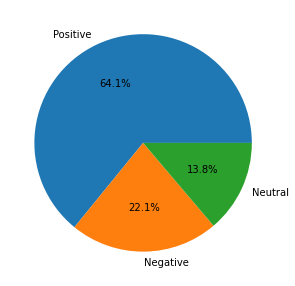

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.pie(x['Sentiment'],labels=x.index,autopct='%1.1f%%')

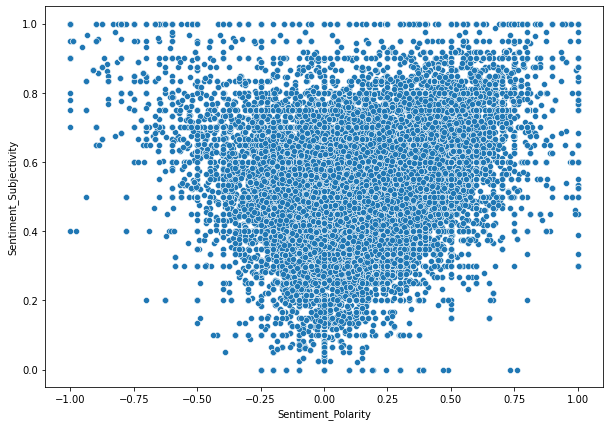

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(x=user_df['Sentiment_Polarity'],y=user_df['Sentiment_Subjectivity'])

## *Subjectivity for most of apps is above 0.4. Mostly for neutral polarity a bit low. Will see more by taking mean.*

In [ ]:
x=pd.merge((user_df.groupby('App').agg({'Sentiment_Polarity':'mean'})),(user_df.groupby('App').agg({'Sentiment_Subjectivity':'mean'})),on='App')
x

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [ ]:
polarity=round(x['Sentiment_Polarity']).tolist()
subjectivity=round(x['Sentiment_Subjectivity']).tolist()
type(subjectivity)

list

Text(0.5, 0, 'Polarity')

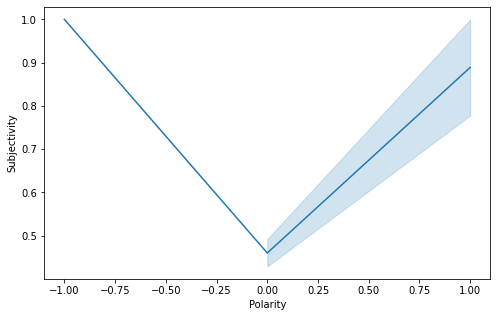

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.lineplot(x=polarity,y=subjectivity)
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

### *As seen before for negetive and positive values of polarity, subjectivity is high and for neutral subjectivity is low. Basis this we can assume that for neutral polarity, senitments or reviews are less.*

### *   Like person giving avg ratings not interested in giving reviews or reviews are good in pitch. Like wise reviews are mostly given by below avg rating or above are actual and neutral rating/neutral sentiments are just for a sake to give a review.

### *In our data we have most of positive reviews. So if required can check our result with counts of positive or negetive sentiments.*

In [ ]:
#trim user DF sentiments with values other than positive and negetive
new_user_df=user_df[(user_df['Sentiment']=='Positive') | (user_df['Sentiment']=='Negetive')]

In [ ]:
def count_psentiments(string):
  count=0
  for index,row in new_user_df[['App','Sentiment']].iterrows():
    if row['App']==string:
      if row['Sentiment']=='Positive':
        count+=1
  return count

def count_nsentiments(string):
  count=0
  for index,row in new_user_df[['App','Sentiment']].iterrows():
    if row['App']==string:
      if row['Sentiment']=='Negative':
        count+=1
  return count

In [ ]:
#sanity check to our function
print(apps_df['App'][1])
print(count_psentiments(apps_df['App'][1]))
count_nsentiments(apps_df['App'][1])

Coloring book moana
26


0

# ***Checking 1st DF***

In [ ]:
#check no of duplicate apps and removing those duplicate rows
apps_df.duplicated(subset='App').value_counts()

False    9660
True     1181
dtype: int64

In [ ]:
apps_df=apps_df.drop_duplicates(subset='App')
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
#Rating has most null values but cannot remove them all. So will remove null values other than ratings.
apps_df.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

In [ ]:
#replacing null values in raating by 0.
apps_df.fillna(0,inplace=True)
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# *There are many numeric value columns that has Dtype object. Will change that to numeric.*

## For Installs

In [ ]:
apps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [ ]:
#function to convert strings to int
def string_to_int(string):
  string=string.replace(',','')
  return int(string[:-1])

In [ ]:
apps_df['Installs']=apps_df['Installs'].apply(string_to_int)

## For Review

In [ ]:
#function for Review column
def string_to_integer(string):
  return int(string)

In [ ]:
apps_df['Reviews']=apps_df['Reviews'].apply(string_to_integer)

## For Price

In [ ]:
#function for price (All prices are in $)
def string_to_float(string):
  if string=='0':
    return 0
  else:
    return float(string[1:])

In [ ]:
apps_df['Price']=apps_df['Price'].apply(string_to_float)

In [ ]:
apps_df['Price'].describe()

count    9648.000000
mean        1.100193
std        16.861727
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
#for better idea
apps_df['Price'].value_counts()

0.00     8895
0.99      143
2.99      124
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

## For Size

In [ ]:
#function for size. Will be giving 0 for app size that varies with device. As size can't be zero and can also be treated as variable size.
def string_to_float_size(string):
  string=string.upper()
  if string=='VARIES WITH DEVICE':
    return 0
  elif 'M' in string:
    return float(string[:-1])*1000
  elif 'K' in string:
    return float(string[:-1])
  else:
    return float(string)

In [ ]:
apps_df['Size_in_kb']=apps_df['Size'].apply(string_to_float_size)

In [ ]:
apps_df['Size_in_kb'].describe()

count      9648.000000
mean      17819.885106
std       21502.004017
min           0.000000
25%        2900.000000
50%        9200.000000
75%       25000.000000
max      100000.000000
Name: Size_in_kb, dtype: float64

# *Taking Updatiion year from 'Last Updated' column. Might prove useful further.*

In [ ]:
def string_to_year(string):
  return int(string[-4:])

In [ ]:
apps_df['updation_year']=apps_df['Last Updated'].apply(string_to_year)

In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Size_in_kb      9648 non-null   float64
 14  updation_year   9648 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


# *Now our Data looks better. We will analize each factors affecting our primary factor ('Rating') or measure for success('Installs') in deep. For 'Review' we already have seen our other set of data.*

# *Starting with type of apps.*

In [ ]:
temp=pd.DataFrame(apps_df['Type'].value_counts())
temp

,Type
Free,8895
Paid,753


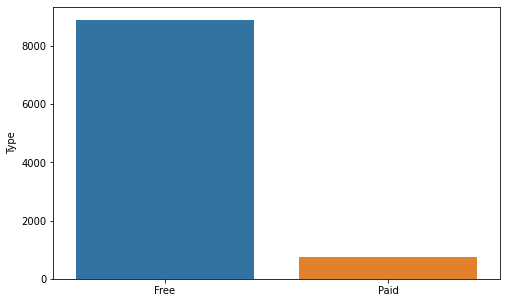

In [ ]:
sns.barplot(x=temp.index,y=temp['Type'])

# *Outcome - There are very few apps that are paid and so we should consider both in seperate way. If we consider all togather, might happen that final resultant has no idea on paid apps or doesn't include any paid apps. So we will not be able to give any conclusion is developer wants to go for developing paid apps.*

# *Checking 'Content Rating' and will try to relate with 'Ratings'*

In [ ]:
apps_df['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
temp=pd.DataFrame(apps_df.groupby('Content Rating').agg({'Rating':'mean'}))
temp

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone,3.490219
Everyone 10+,4.015265
Mature 17+,3.744275
Teen,3.719884
Unrated,2.050000


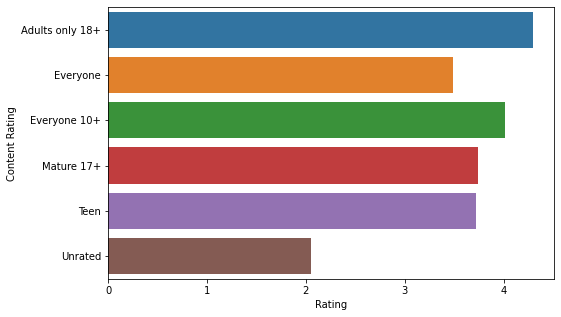

In [ ]:
sns.barplot(y=temp.index,x=temp['Rating'])          #can even try with scatter plot.

# *Outcome - Rating by each group is almost more than average(above 3.5)*

# Final Strategy :

*   Checking paid and free apps.

1.   There are comparitively less paid apps. Can make conclusion easily with that.
2.   Get most installed apps. Sanity check its ratings, reviews and other factors. Make a conclusion based on its Catagory. Like this sort of catagory are success if even developer wants to go for paid apps.

*   Then going with free apps. We can check how frequent app is updated. 

1.   If there is no update since long we can make a conclusion that those are may be not be in service. Even will check those but would be less prefered.
2.   Will move forward with apps those are frequently updated.

*   Free apps with frequent updates.

1.   Will further divide this in 4 DF based on their installs. 
2.   Can get which catagory is good in all groups based on ratings, reviews and size.
3. This will also lead us to which catagory has less success in current market.

*   Free apps with less updates ( for not updated within 2 years)

1.   Will directly get catagories of them based on high installs and check its revies, ratings and size.


* We will be having 3 good conclusions.
1. Paid apps. 
2. For free apps. 
3. For free outdated apps.

# *Let's check successful paid apps*

In [ ]:
#selecting paid apps
paid_apps_df=apps_df[apps_df['Type']=='Paid']

In [ ]:
paid_apps_df.sort_values(by=['Installs','Rating'],ascending=[False,False],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
paid_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_kb,updation_year
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29000.0,2018
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,0.0,2018
9678,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,69000.0,2018
4260,Cut the Rope GOLD,FAMILY,4.6,61264,43M,1000000,Paid,0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,43000.0,2018
5631,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,50000.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,0.0,0,56M,0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,56000.0,2017
9719,EP Cook Book,MEDICAL,0.0,0,3.2M,0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,3200.0,2015
9905,Eu sou Rico,FINANCE,0.0,0,2.6M,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,2600.0,2018
9917,Eu Sou Rico,FINANCE,0.0,0,1.4M,0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up,1400.0,2018


In [ ]:
#Most success apps 
temp1=paid_apps_df.head(200)

In [ ]:
temp1['Positive Sentiments']=temp1['App'].apply(count_psentiments)

KeyboardInterrupt: ignored

In [ ]:
#which category is more succesfull in most success paid apps
category_counts=pd.DataFrame(temp1['Category'].value_counts().head(10))
category_counts

,Category
FAMILY,58
GAME,40
PERSONALIZATION,16
MEDICAL,14
TOOLS,12
HEALTH_AND_FITNESS,8
PHOTOGRAPHY,7
PRODUCTIVITY,7
WEATHER,5
COMMUNICATION,5


([<matplotlib.patches.Wedge at 0x7fe727f88a58>,
 [Text(0.5383595970851739, 0.959254368885693, 'FAMILY'),
  Text(-1.0533606899154182, 0.3169089095322414, 'GAME'),
  Text(-0.8192493171075442, -0.7340507859942816, 'PERSONALIZATION'),
  Text(-0.31690888487655516, -1.0533606973332061, 'MEDICAL'),
  Text(0.19980068092600142, -1.0817022177575057, 'TOOLS'),
  Text(0.5730345099810952, -0.9389523152805613, 'HEALTH_AND_FITNESS'),
  Text(0.8057061137576718, -0.7488909521776251, 'PHOTOGRAPHY'),
  Text(0.9689270538080476, -0.5207498097924348, 'PRODUCTIVITY'),
  Text(1.0589730484091515, -0.2976173428129297, 'WEATHER'),
  Text(1.0954160259572059, -0.10031814430162639, 'COMMUNICATION')],
 [Text(0.2936506893191857, 0.5232296557558326, '33.7%'),
  Text(-0.5745603763175008, 0.17285940519940438, '23.3%'),
  Text(-0.4468632638768423, -0.40039133781506264, '9.3%'),
  Text(-0.17285939175084827, -0.5745603803635669, '8.1%'),
  Text(0.10898218959600077, -0.590019391504094, '7.0%'),
  Text(0.3125642781715064, -0

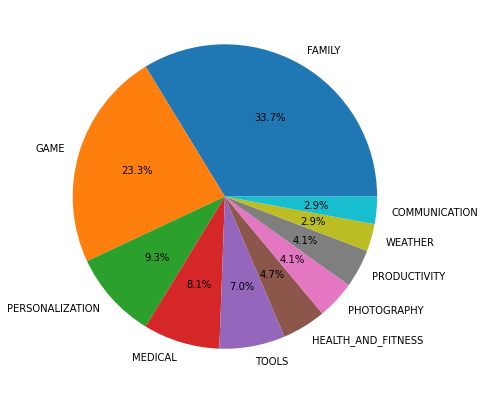

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(category_counts['Category'],labels=category_counts.index,autopct='%1.1f%%')

In [ ]:
#can see sub catagories
genres_counts=pd.DataFrame(temp1['Genres'].value_counts().head(10))
genres_counts

,Genres
Personalization,16
Role Playing,16
Action,16
Medical,14
Tools,12
Strategy,9
Puzzle,8
Health & Fitness,8
Arcade,8
Photography,7


([<matplotlib.patches.Wedge at 0x7fe727f1e588>,
 [Text(0.9947928752251085, 0.46945408231408725, 'Personalization'),
  Text(0.2700340253456176, 1.06634029519457, 'Role Playing'),
  Text(-0.6514587924903009, 0.886341605526379, 'Action'),
  Text(-1.0933237477827822, 0.12100901840033106, 'Medical'),
  Text(-0.9039555792454617, -0.6267888885031402, 'Tools'),
  Text(-0.4139402882173783, -1.0191434824353802, 'Strategy'),
  Text(0.09083729352452227, -1.0962429411882841, 'Puzzle'),
  Text(0.5500000148652437, -0.9526279355804299, 'Health & Fitness'),
  Text(0.9039556085875656, -0.6267888461859257, 'Arcade'),
  Text(1.0795966472106115, -0.21088167139798242, 'Photography')],
 [Text(0.5426142955773319, 0.2560658630804112, '14.0%'),
  Text(0.14729128655215504, 0.5816401610152199, '14.0%'),
  Text(-0.3553411595401641, 0.48345905755984303, '14.0%'),
  Text(-0.5963584078815175, 0.0660049191274533, '12.3%'),
  Text(-0.4930666795884336, -0.3418848482744401, '10.5%'),
  Text(-0.2257856117549336, -0.555896

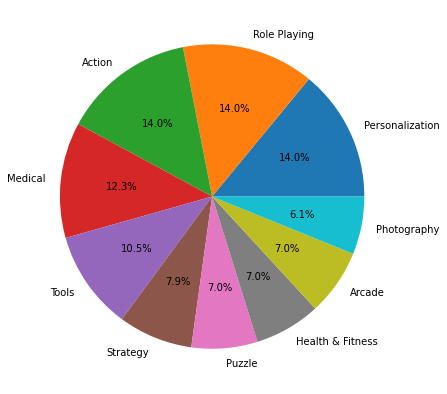

In [ ]:
plt.pie(genres_counts['Genres'],labels=genres_counts.index,autopct='%1.1f%%')

# *That was for overall paid apps. Lets check it in current market. i.e. We will consider apps updated in 1 year are recent apps and others are outdated apps.*

In [ ]:
#there are no apps updated in 1 year so consideering 2 years - from 2018
current_paid_apps_df=apps_df[(apps_df['Type']=='Paid') & (apps_df['updation_year']>=2018)]
current_paid_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updation_year,Size_in_kb
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,2018,6800.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,2018,0.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,2018,0.0
480,Ad Blocker for SayHi,DATING,0.0,4,1.2M,100,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up,2018,1200.0
853,Toca Life: City,EDUCATION,4.7,31085,24M,500000,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,2018,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Solitaire+,GAME,4.6,11235,Varies with device,100000,Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device,2018,0.0
10682,Fruit Ninja Classic,GAME,4.3,85468,36M,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,2018,36000.0
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,2018,861.0
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2018,2400.0


In [ ]:
current_paid_apps_df.sort_values(by=['Installs','Rating'],ascending=[False,False],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp1=current_paid_apps_df.head(100)

In [ ]:
#which category is more succesfull
category_counts=pd.DataFrame(temp1['Category'].value_counts().head(10))
category_counts

,Category
FAMILY,20
GAME,18
TOOLS,10
HEALTH_AND_FITNESS,6
PRODUCTIVITY,6
PERSONALIZATION,5
MEDICAL,4
WEATHER,3
SPORTS,3
PHOTOGRAPHY,3


([<matplotlib.patches.Wedge at 0x7fe72843cc18>,
 [Text(0.7619967526747025, 0.7933227268351818, 'FAMILY'),
  Text(-0.7619968640890462, 0.7933226198202469, 'GAME'),
  Text(-1.0433900439116068, -0.348334919676646, 'TOOLS'),
  Text(-0.6248710828564846, -0.9052823481156387, 'HEALTH_AND_FITNESS'),
  Text(-0.132590161498935, -1.0919797841872745, 'PRODUCTIVITY'),
  Text(0.3483349929435644, -1.0433900194515027, 'PERSONALIZATION'),
  Text(0.6956900877930215, -0.8520653154227897, 'MEDICAL'),
  Text(0.9052823846810452, -0.6248710298823272, 'WEATHER'),
  Text(1.0285179529879338, -0.39006514889375926, 'SPORTS'),
  Text(1.0919797919460144, -0.13259009759985624, 'PHOTOGRAPHY')],
 [Text(0.41563459236801953, 0.43272148736464455, '25.6%'),
  Text(-0.4156346531394797, 0.43272142899286187, '23.1%'),
  Text(-0.5691218421336036, -0.1900008652781705, '12.8%'),
  Text(-0.34083877246717337, -0.49379037169943923, '7.7%'),
  Text(-0.07232190627214634, -0.5956253368294224, '7.7%'),
  Text(0.19000090524194418, -0.5

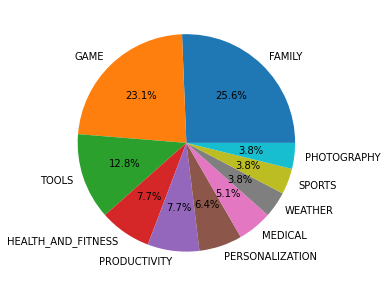

In [ ]:
plt.pie(category_counts['Category'],labels=category_counts.index,autopct='%1.1f%%')

# *Now lets check free apps that are usually updated.*

In [ ]:
free_apps=apps_df[(apps_df['Type']=='Free') & (apps_df['updation_year']>=2018)]
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updation_year,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,2018,0.0
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up,2018,13000.0
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,0.0,38,9.8M,5000,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up,2018,9800.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018,3600.0


In [ ]:
free_apps['Installs'].describe()

count    5.956000e+03
mean     1.176727e+07
std      6.792207e+07
min      0.000000e+00
25%      5.000000e+03
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

# We can't ignore any values. So will take it in 3 parts.

# 1st - min - 25%
# 2 - 25% - 75%
# 3- 75% to max